<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/zadanie_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Przygotowanie danych do modeli regresyjnych


Pobierz zbiór danych (concrete_data.csv) i wgraj plik do środowiska wykonawczego Google Colab lub na dysk Google.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
dataset_path = '/drive/My Drive/Machine Learning/Google Colab/zajęcia_1/Praca domowa/concrete_data_preprocessed.csv'
df_concrete = pd.read_csv(dataset_path)
df_concrete.head(15)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312,79.99
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312,61.89
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569,40.27
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865,41.05
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375,44.30
5,-0.121115,0.487142,-0.865375,2.153185,-1.019640,-0.546508,-1.278800,0.692955,47.03
6,0.971967,0.266540,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865,43.70
7,0.971967,0.266540,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,-0.280312,36.45
8,-0.121115,0.487142,-0.865375,2.153185,-1.019640,-0.546508,-1.278800,-0.280312,45.85
9,1.882868,-0.836471,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,-0.280312,39.29


Zweryfikuj zbiór danych pod kątem wartości pustych i typów danych w kolumnach. Sprawdź występowanie duplikatów i usuń, jeżeli występują.

In [ ]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   float64
 8   csMPa             1005 non-null   float64
dtypes: float64(9)
memory usage: 70.8 KB


In [ ]:
df_concrete.isnull().sum()

,0
cement,0
slag,0
flyash,0
water,0
superplasticizer,0
coarseaggregate,0
fineaggregate,0
age,0
csMPa,0


In [ ]:
df_concrete.duplicated().sum()

0

Zweryfikuj, jak rozkładają się dane w poszczególnych zmiennych. Wygeneruj histogramy.

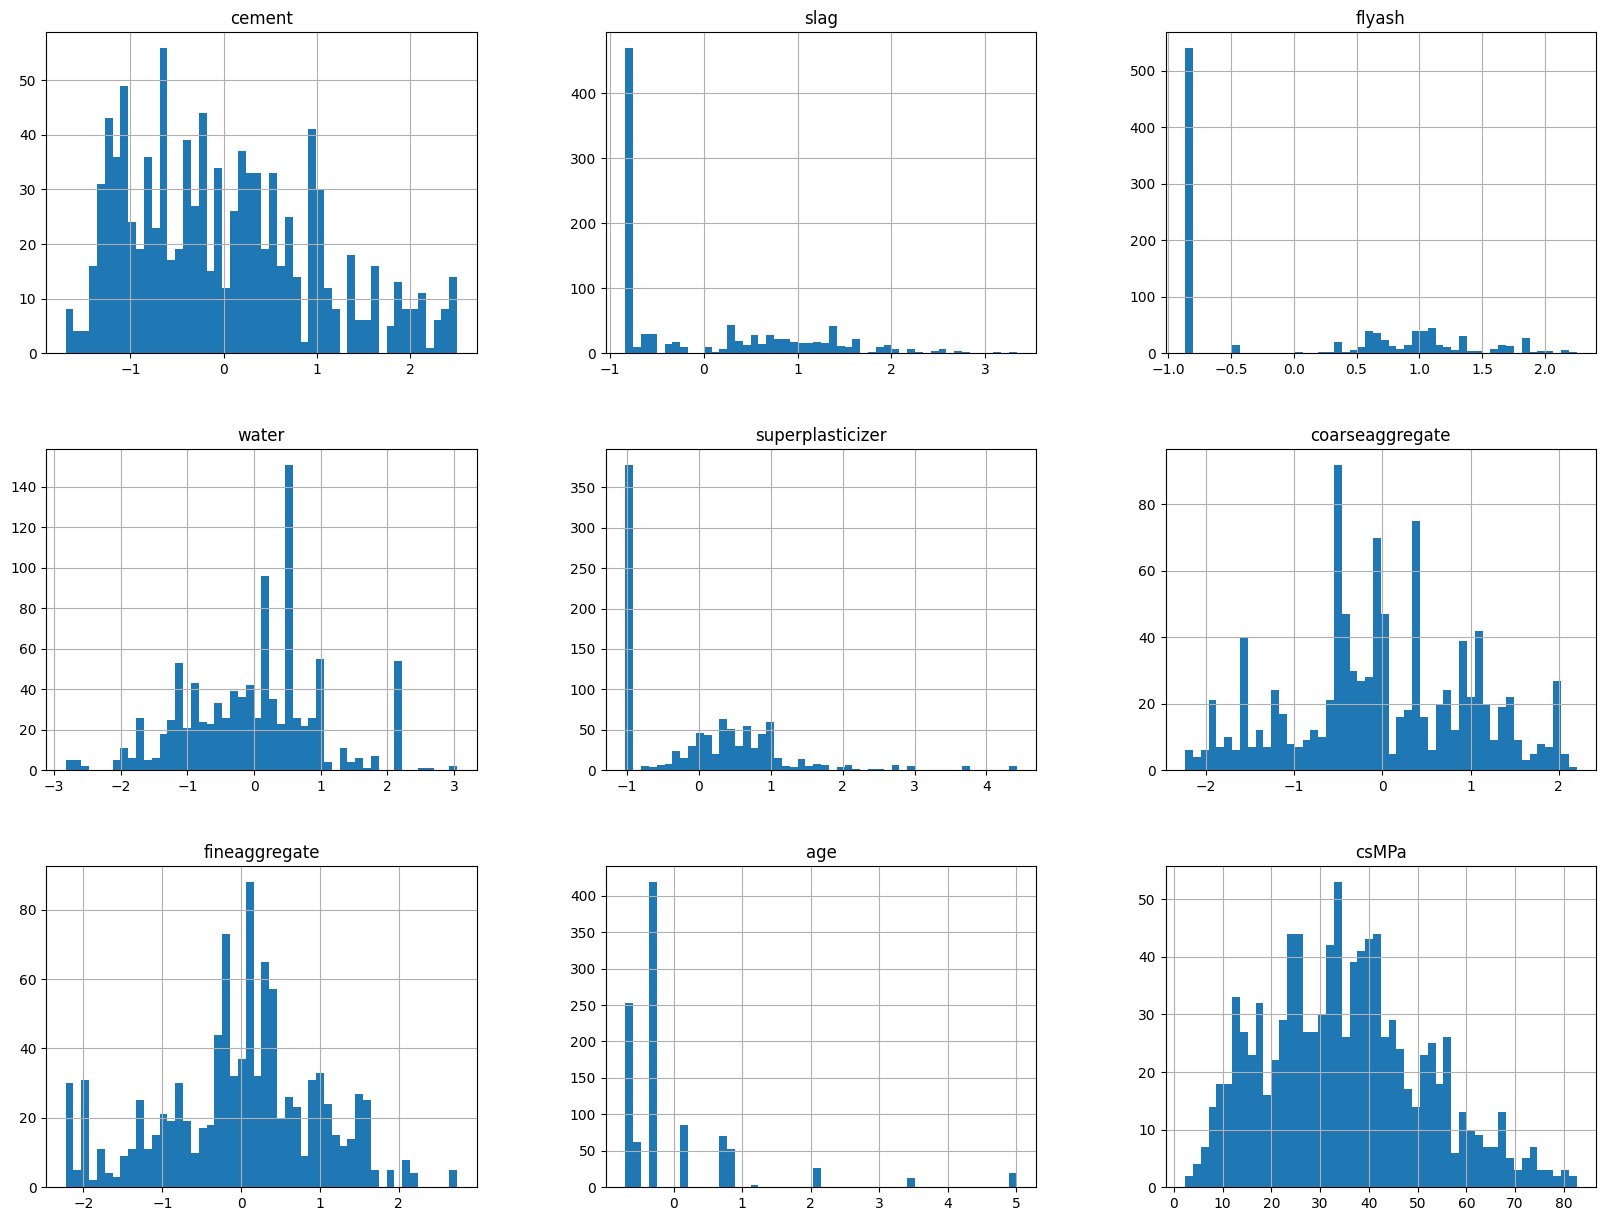

In [ ]:
df_concrete.hist(bins=50, figsize=(20,15))
plt.show()

Zweryfikuj, jak rozkładają się wartości poszczególnych zmiennych wobec zmiennej zależnej. Wygeneruj wykresy punktowe.

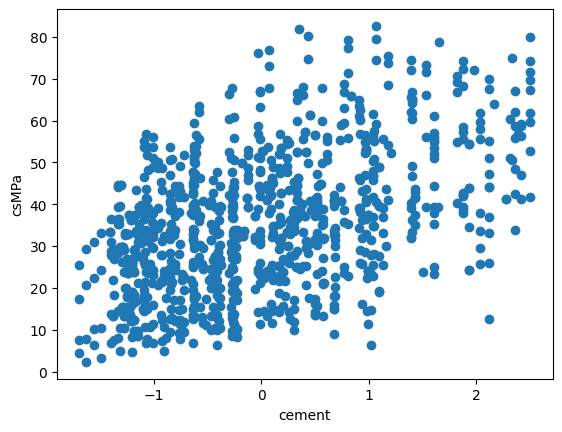

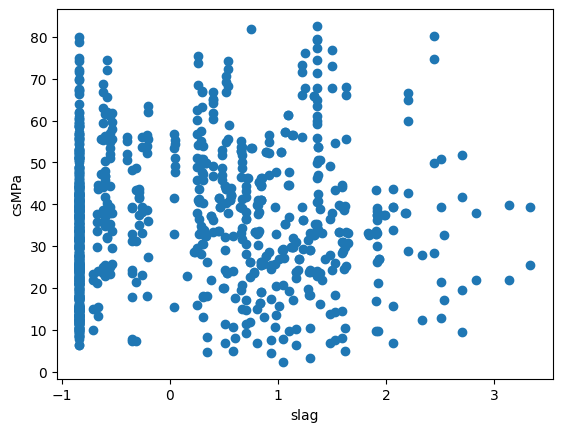

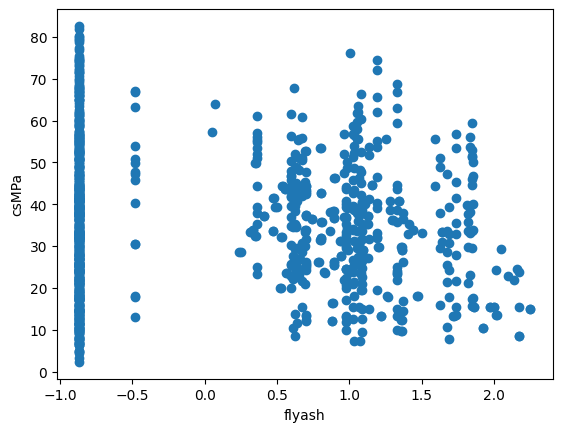

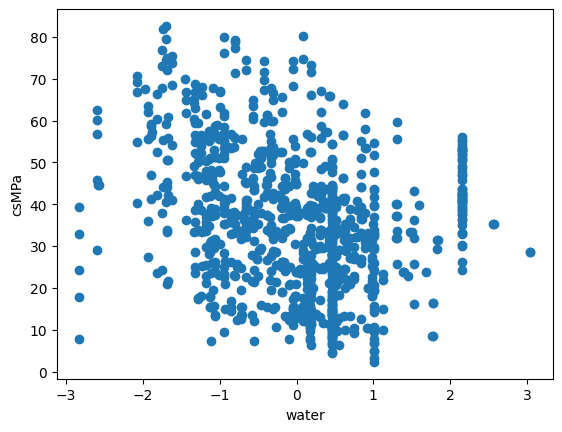

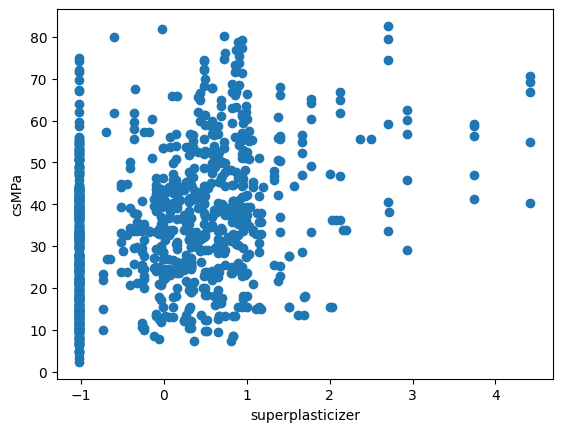

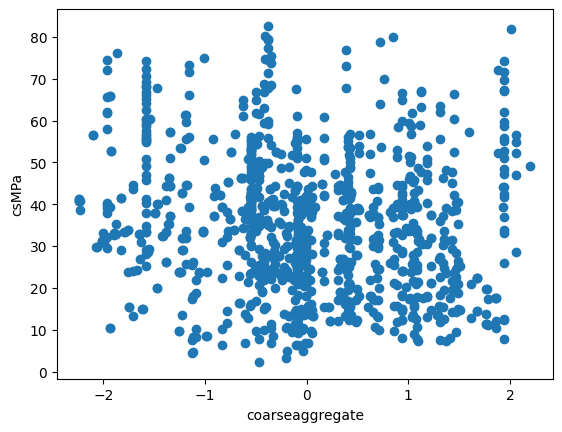

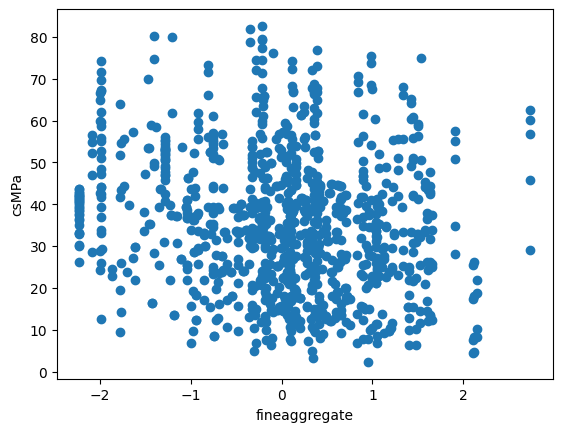

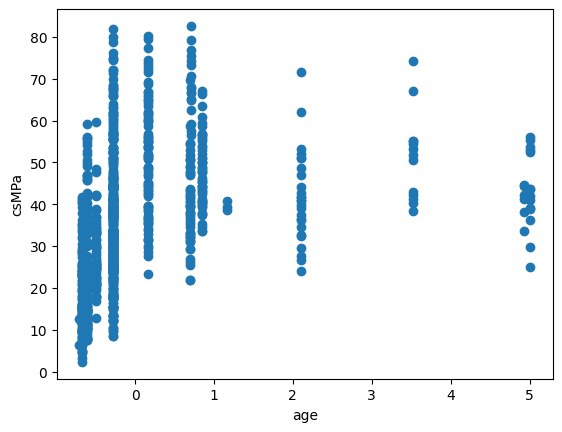

In [ ]:
columns = df_concrete.columns.tolist()

for column in columns:
  if column != 'csMPa':
    plt.scatter(df_concrete[column], df_concrete['csMPa'])
    plt.xlabel(column)
    plt.ylabel('csMPa')
    plt.show()
  else:
    continue

Wygeneruj macierz korelacji między zmiennymi.

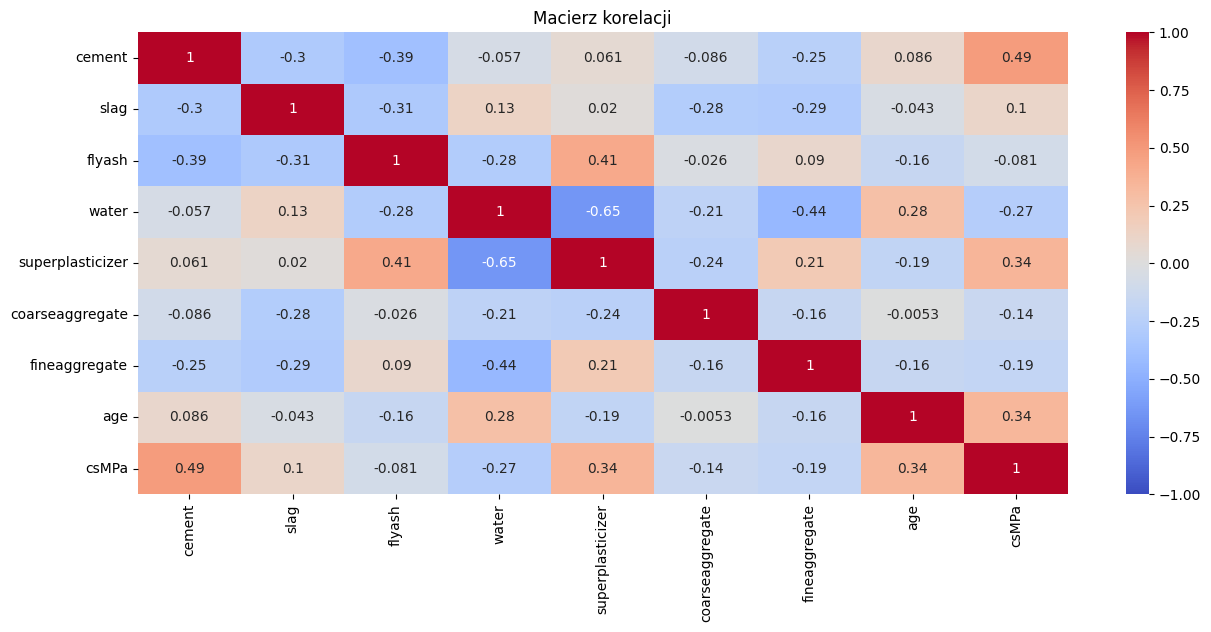

In [ ]:
correlation_matrix = df_concrete.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Macierz korelacji")
plt.show()

Dokonaj skalowania zmiennych – wybierz jedną z dwóch poznanych metod: standaryzację lub normalizację.

Normalizacja po podziale na zbiory

# Regresja liniowa - zadanie

Zaimportuj potrzebne biblioteki, aby zbudować model regresji liniowej z wykorzystaniem biblioteki Scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Podziel dane na treningowe i testowe w proporcji 70/30.

In [ ]:
X = df_concrete.drop('csMPa', axis=1)
y = df_concrete['csMPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Normalizacja danych po podziale na zbiory

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
normalized_X_train = normalizer.transform(X_train)
normalized_X_test = normalizer.transform(X_test)

In [ ]:
lin_reg_norm = LinearRegression()
lin_reg_norm.fit(normalized_X_train, y_train)
print(f'norm: {lin_reg_norm.score(normalized_X_test, y_test)}')

Utwórz instancję modelu LinearRegression. Przypisz ją do zmiennej linear_reg.

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

Sprawdź skuteczność wytrenowanego klasyfikatora na zbiorze testowym. Wykorzystaj do tego wybraną metrykę.

In [ ]:
# Predict y values based on features in test set
y_pred = lin_reg.predict(X_test)

# Print R2 score value with .score() method
print(f"R2 score: {lin_reg.score(X_test, y_test)}") # or X_train, y_train for training set score


R2 score: 0.5609151111173308


In [ ]:
# Alternatively - R2 score using r2_score from sklearn.metrics
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))


#Średni błąd bezwzględny

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

print(f"Mean absolute error: {mae}")

#Średni błąd kwadratowy
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)

print(f"Mean squared error: {mse}")

#Pierwiastek błędu średniokwadratowego

from sklearn.metrics import r2_score
r2_score(y_pred, y_test)
print(f"Root mean squared error: {np.sqrt(mse)}")

# Współczynnik determinacji R2
def adjusted_r2_score(r2, n, k):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return adjusted_r2

print(adjusted_r2_score(lin_reg.score(X_test, y_test), len(y_test), len(X_test.columns)))

0.5609151111173308
Mean absolute error: 8.984068581174693
Mean squared error: 126.2092910740317
Root mean squared error: 11.23429085763902
0.5489264452092716


#**Regresja liniowa z regularyzacją - zadanie**

Utwórz słownik z hiperparametrami (C), które chcesz wykorzystać do znalezienia optymalnego zestawu.

In [ ]:
dict_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

Utwórz instancję modelu LogisticRegression. Przypisz ją do zmiennej lr.

In [ ]:
X = df_concrete.drop('csMPa', axis=1)
y = df_concrete['csMPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Tworzenie modelu regresji liniowej
lr = LinearRegression()

Wykorzystaj wyszukiwanie losowe, aby znaleźć najlepszy zestaw hiperparametrów. Wybierz tę samą metrykę, co w zadaniu 1.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

# Zdefiniowanie przestrzeni hiperparametrów dla regresji liniowej
dict_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}



# Tworzenie obiektu RandomizedSearchCV
random_search = RandomizedSearchCV(lr, param_distributions=dict_params, n_iter=4, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Dopasowanie modelu do danych treningowych
random_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
best_params = random_search.best_params_
print(f"Najlepsze hiperparametry: {best_params}")

# Ocena modelu na zbiorze testowym
best_model = random_search.best_estimator_
mse = -best_model.score(X_test, y_test)
print(f"Błąd średniokwadratowy na zbiorze testowym: {mse}")

Najlepsze hiperparametry: {'positive': False, 'fit_intercept': True}
Błąd średniokwadratowy na zbiorze testowym: -0.5609151111173308


Wytrenuj model z wykorzystaniem zwróconych przez wyszukiwanie losowe parametrów.

In [ ]:
random_search.fit(X_test, y_test)
y_pred = best_model.predict(X_test)

Sprawdź skuteczność wytrenowanego klasyfikatora na zbiorze testowym. Wykorzystaj do tego wybraną metrykę.

In [ ]:
# Obliczenie błędu średniokwadratowego na zbiorze testowym
mse = mean_squared_error(y_test, y_pred)
print(f"Błąd średniokwadratowy na zbiorze testowym: {mse}")

Błąd średniokwadratowy na zbiorze testowym: 126.2092910740317


# **Drzewo decyzyjne 1 - zadanie**

Prześlij do środowiska wykonawczego Google Colab plik z zeskalowanymi danymi (concrete_data_preprocessed.csv) i wczytaj zbiór do ramki danych z wykorzystaniem biblioteki Pandas.

In [ ]:
dataset_path = '/drive/My Drive/Machine Learning/Google Colab/zajęcia_1/Praca domowa/concrete_data_preprocessed.csv'
df_concrete = pd.read_csv(dataset_path)
df_concrete.head(15)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312,79.99
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312,61.89
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569,40.27
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865,41.05
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375,44.30
5,-0.121115,0.487142,-0.865375,2.153185,-1.019640,-0.546508,-1.278800,0.692955,47.03
6,0.971967,0.266540,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865,43.70
7,0.971967,0.266540,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,-0.280312,36.45
8,-0.121115,0.487142,-0.865375,2.153185,-1.019640,-0.546508,-1.278800,-0.280312,45.85
9,1.882868,-0.836471,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,-0.280312,39.29


In [ ]:
X = df_concrete.drop('csMPa', axis=1)
y = df_concrete['csMPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
normalized_X_train = normalizer.transform(X_train)
normalized_X_test = normalizer.transform(X_test)

Utwórz słownik z hiperparametrami (max_depth, criterion, min_samples_leaf), które chcesz wykorzystać do znalezienia optymalnego zestawu.


In [ ]:
dict_params = {
    'max_depth': [None, 10,20,30,40,50,60,70,80,90,100],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'min_samples_leaf': [1, 2,3,4,5,6,7,8,9,10],
}

Do znalezienia najlepszego zestawu parametrów, wykorzystaj wyszukiwanie losowe i kroswalidację. Jako metrykę do oceny zestawu hiperparametrów, wybierz średni błąd bezwzględny. Zapisz najlepszy zestaw hiperparametrów do zmiennej best_hyperparams.

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, space_eval
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, dict_params, cv=5, scoring='neg_mean_absolute_error', error_score='raise')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print(f"Najlepsze hiperparametry: {best_params}")

Najlepsze hiperparametry: {'criterion': 'poisson', 'max_depth': 90, 'min_samples_leaf': 1}


Wytrenuj model z wykorzystaniem zwróconych przez wyszukiwanie losowe parametrów, zapisanych w poprzednim kroku do zmiennej. Dodaj wizualizację obrazującą strukturę wytrenowanego drzewa.

In [ ]:
grid_search.fit(X_test, y_test)
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Średni błąd bezwzględny (MAE): {mae}")

Średni błąd bezwzględny (MAE): 2.18658940397351


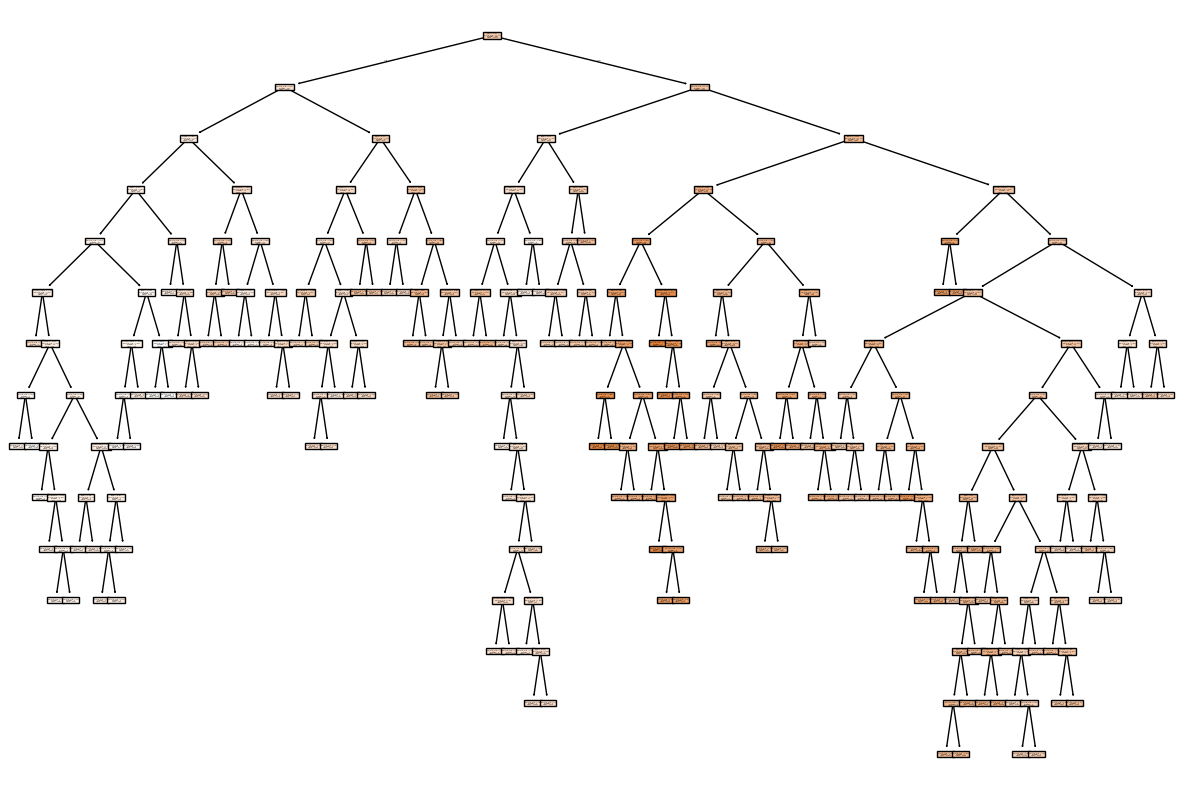

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_model = grid_search.best_estimator_
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns)
plt.show()

Sprawdź skuteczność wytrenowanego modelu regresji, wykorzystując współczynnik determinacji na zbiorze treningowym i testowym. Dodatkowo oblicz średni błąd kwadratowy i średni błąd bezwzględny na zbiorze testowym.

In [ ]:
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score

print(f"Średni błąd bezwzględny (MAE): {mae}")
print(f"Średni błąd kwadratowy (MSE): {mse}")
print(f"Współczynnik determinacji (R^2): {r2}")

Średni błąd bezwzględny (MAE): 2.18658940397351
Średni błąd kwadratowy (MSE): 13.148314238410595
Współczynnik determinacji (R^2): <function r2_score at 0x7ebdf9c7e8c0>


#**Drzewo decyzyjne (regresja) - zadanie 2**


Zaimportuj potrzebne biblioteki, aby zbudować drzewo decyzyjne (regresja) z wykorzystaniem biblioteki Scikit-learn.

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, space_eval
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Prześlij do środowiska wykonawczego Google Colab plik z zeskalowanymi danymi (concrete_data_preprocessed.csv) i wczytaj zbiór do ramki danych z wykorzystaniem biblioteki Pandas.

In [ ]:
dataset_path = '/drive/My Drive/Machine Learning/Google Colab/zajęcia_1/Praca domowa/concrete_data_preprocessed.csv'
df_concrete = pd.read_csv(dataset_path)
df_concrete.head(15)

X = df_concrete.drop('csMPa', axis=1)
y = df_concrete['csMPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
normalized_X_train = normalizer.transform(X_train)
normalized_X_test = normalizer.transform(X_test)

Utwórz słownik z hiperparametrami (max_depth, criterion, min_samples_leaf, max_features), które chcesz wykorzystać do znalezienia optymalnego zestawu.

In [ ]:
dict_params = {
    'max_depth': [None, 10,20,30,40,50,60,70,80,90,100],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'min_samples_leaf': [1, 2,3,4,5,6,7,8,9,10],
    'max_features': ['sqrt', 'log2', None]
}

Do znalezienia najlepszego zestawu parametrów, wykorzystaj wyszukiwanie losowe i kroswalidację. Jako metrykę do oceny zestawu hiperparametrów, wybierz średni błąd bezwzględny. Zapisz najlepszy zestaw hiperparametrów do zmiennej best_hyperparams

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
model = DecisionTreeRegressor()

random_search = RandomizedSearchCV(model, param_distributions=dict_params, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42, error_score='raise')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

print(f"Najlepsze hiperparametry: {best_params}")

Najlepsze hiperparametry: {'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'absolute_error'}


Wytrenuj model z wykorzystaniem zwróconych przez wyszukiwanie losowe parametrów, zapisanych w poprzednim kroku do zmiennej. Dodaj wizualizację obrazującą strukturę wytrenowanego drzewa.

In [ ]:
random_search.fit(X_test, y_test)
y_pred = random_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Średni błąd bezwzględny (MAE): {mae}")

Średni błąd bezwzględny (MAE): 2.18658940397351


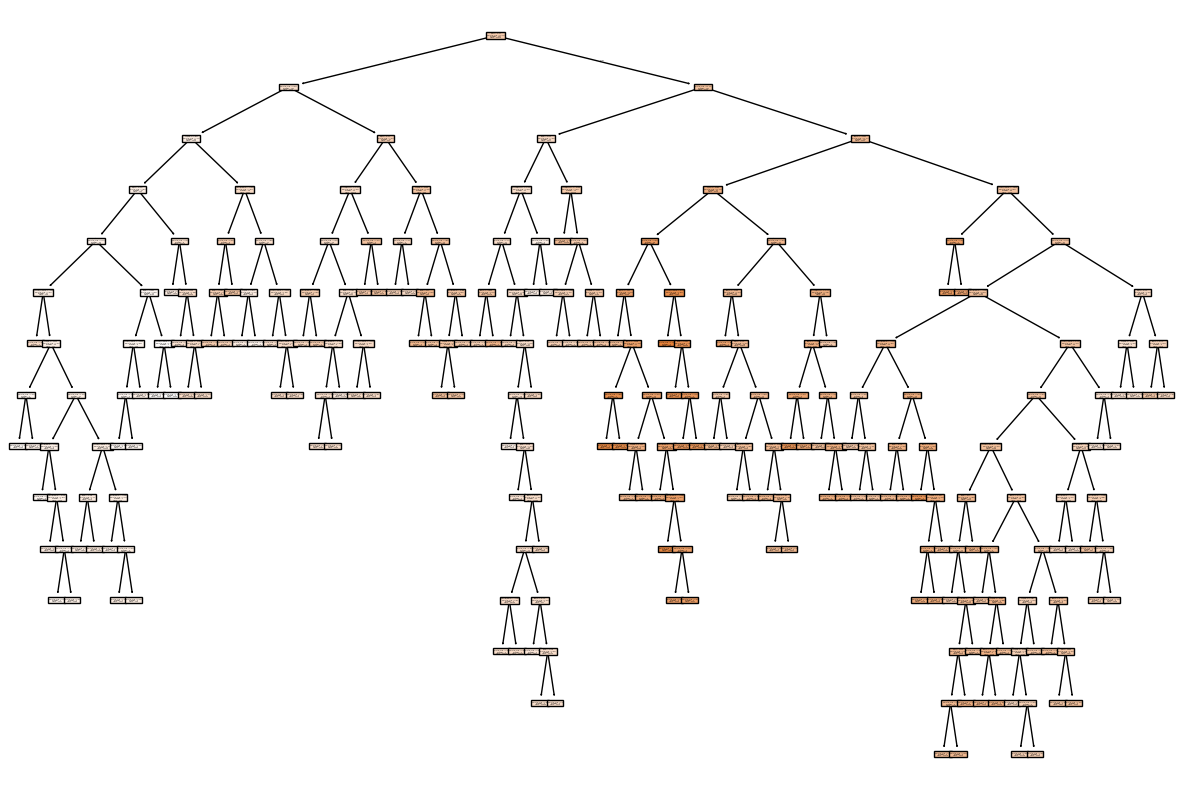

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_model = random_search.best_estimator_
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score

print(f"Średni błąd bezwzględny (MAE): {mae}")
print(f"Średni błąd kwadratowy (MSE): {mse}")
print(f"Współczynnik determinacji (R^2): {r2}")

Średni błąd bezwzględny (MAE): 2.18658940397351
Średni błąd kwadratowy (MSE): 12.863875165562915
Współczynnik determinacji (R^2): <function r2_score at 0x7ebdf9c7e8c0>
